# Problem 1.
Consider the following linear program:

Max $z = 10x_1+15x_2$  
st.  
$$\begin{aligned}
2x_1 +4x_2 &≤100 \\
3x_1 +2x_2 &≤ 80 \\
1x_1 +2x_2 &≤ 30 \\ 
x_1,x_2 &≥0 \\
\end{aligned}$$

a. Solve the problem given above by a graphical LP technique.

b. Give the shadow price of each constraint.

c. Give the range of variation on each objective function coefficient. 

d. Give the range on each right hand side value.

## A) Solve the problem given above by a graphical LP technique.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

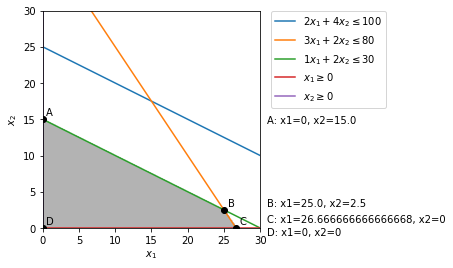

In [2]:
# Solve Problem Graphically

# plot the lines defining the constraints
def plot_constraints_1():
    x1 = np.linspace(0, 100, 20)

    # 2x_1 +4x_2 ≤100 
    x2c1 = 25 - 0.5*x1
    plt.plot(x1, x2c1, label=r'$2x_1 +4x_2 \leq100$')

    # 3x_1 +2x_2 ≤ 80
    x2c2 = 40 - 1.5*x1
    plt.plot(x1, x2c2, label=r'$3x_1 +2x_2 \leq80$')

    # 1x_1 +2x_2 ≤ 30 
    x2c3 = 15 - 0.5*x1
    plt.plot(x1, x2c3, label=r'$1x_1 +2x_2 \leq30$')

    # x_1,x_2 ≥0
    plt.plot(x1, x1*0, label=r'$x_1 \geq0$')
    plt.plot(x1*0, x1, label=r'$x_2 \geq0$')

    # Plot's Params
    plt.xlim(0,30)
    plt.ylim(0,30)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

# plot the feasible region
def plot_feasible_1():
    d = np.linspace(0,40,250)
    x1,x2 = np.meshgrid(d,d)
    plt.imshow( ((2*x1+4*x2<=100) & (3*x1+2*x2<=80) & (1*x1+2*x2<=30)).astype(int), 
                    extent=(x1.min(),x1.max(),x2.min(),x2.max()),
                       origin="lower", cmap="Greys", alpha = 0.3);

# Plot Corners
def plot_corners_1a():
    '''
    Coordinate given by:
        Ax+By=C
        x= ((C1*B2)-(C2*B1)) / ((A1*B2)-(A2*B1))
    '''
    # Corner A
    A_x1= 0
    A_x2= (30/2) # Constraint divided by coefficient
    plt.plot(A_x1, A_x2,'ko')
    plt.text(A_x1 +0.5, A_x2 +0.5, "A", fontsize=10)
    plt.text(31, A_x2 - 0.5 , f"A: x1={A_x1}, x2={A_x2}", fontsize=10)

    # Corner B
    B_x1= (80-30)/(3-1)
    B_x2= (80-(30*3))/(2-(2*3))
    plt.plot(B_x1, B_x2,'ko')
    plt.text(B_x1 +0.5, B_x2 +0.5, "B", fontsize=10)
    plt.text(31, B_x2 + 0.5 , f"B: x1={B_x1}, x2={B_x2}", fontsize=10)

    # Corner C
    C_x1= (80/3) # Constraint divided by coefficient
    C_x2= 0
    plt.plot(C_x1, C_x2,'ko')
    plt.text(C_x1 +0.5, C_x2 +0.5, "C", fontsize=10)
    plt.text(31, C_x2 + 0.75 , f"C: x1={C_x1}, x2={C_x2}", fontsize=10)

    # Corner D
    D_x1= 0 
    D_x2= 0
    plt.plot(D_x1, C_x2,'ko')
    plt.text(D_x1 +0.5, D_x2 +0.5, "D", fontsize=10)
    plt.text(31, D_x2 - 1 , f"D: x1={D_x1}, x2={D_x2}", fontsize=10)
    
    return A_x1,A_x2,B_x1,B_x2,C_x1,C_x2,D_x1,D_x2
    
plot_constraints_1()
plot_feasible_1()
A_x1,A_x2,B_x1,B_x2,C_x1,C_x2,D_x1,D_x2 = plot_corners_1a()

In [3]:
# Max z = 10x_1+15x_2
def calc_z_1(x1,x2):
        return (10*x1)+(15*x2)
    
print(f"Value of Z at A: {calc_z_1(A_x1,A_x2)}")
print(f"Value of Z at B: {calc_z_1(B_x1,B_x2)}")
print(f"Value of Z at C: {calc_z_1(C_x1,C_x2)}")
print(f"Value of Z at D: {calc_z_1(D_x1,D_x2)}")

Value of Z at A: 225.0
Value of Z at B: 287.5
Value of Z at C: 266.6666666666667
Value of Z at D: 0


From this we find the highest value of $z$ is 287.5, obtained when $x_1$ is 25 and $x_2$ is 2.5

## B) Give the shadow price of each constraint.

In [4]:
# Shadow Prices

# 2x_1 +4x_2 ≤101
# is zero

# 3x_1 +2x_2 ≤ 81
# x_2 = 40.5 -1.5x_1
# 15 -0.5x_1 = 40.5 -1.5x_1)
x_1 = 40.5-15
x_2 = 40.5 - (1.5*x_1)
sp_1 = calc_z_1(x_1,x_2)-calc_z_1(B_x1,B_x2)
print(f"Shadow price of 3x_1 +2x_2 ≤ 80 is {sp_1} per unit")

# 1x_1 +2x_2 ≤ 31
# x_2 = 15.5 -0.5x_1
# 40 -1.5x_1 = 15.5 -0.5x_1
x_1 = 40-15.5
x_2 = 15.5 -(0.5*x_1)
sp_2 = calc_z_1(x_1,x_2)-calc_z_1(B_x1,B_x2)
print(f"Shadow price of 1x_1 +2x_2 ≤ 30 is {sp_2} per unit")

Shadow price of 3x_1 +2x_2 ≤ 80 is 1.25 per unit
Shadow price of 1x_1 +2x_2 ≤ 30 is 6.25 per unit


The shadow price for $2x_1+4x_2 ≤100$ is $0$. \
The shadow price for $3x_1+2x_2 ≤ 80$ is $1.25$ per unit. \
The shadow price for $1x_1+2x_2 ≤ 30$ is $6.25$ per unit.

## C) Give the range of variation on each objective function coefficient. 

**Range on Objective Function Coefficients** \
$z = 10x_1+15x_2$ 

Solving for $x_2$

$x_2 = 40 -1.5x_1$ \
$x_2 = 15 -0.5x_1$

Gives:

$-1.5 \leq -\frac{c_1}{c_2} \leq -0.5$

Solving for $c_1 = 10$ 

$-1.5 \leq -\frac{10}{c_2} \leq -0.5$ \
$1.5c_2 \geq 10 \geq 0.5c_2$ \
$c_2 \geq 6\frac{2}{3}$, $c_2 \leq 20$ \
$\mathbf{6\frac{2}{3} \leq c_2 \leq 20}$ 

Solving for $c_2 = 15$

$-1.5 \leq -\frac{c_1}{15} \leq -0.5$ \
$22.5 \geq c_1 \geq 7.5$ \
$\mathbf{7.5 \leq c_1 \leq 22.5}$ 

For coefficient values between $7.5$ and $22.5$ the value of $x_1 = 25$ remains optimal.\
And for coefficient values between $6\frac{2}{3}$ and $20$ the value of $x_2 = 2.5$ remains optimal.

## D) Give the range on each right hand side value.

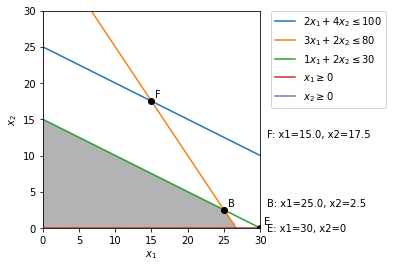

In [5]:
# Range of Each Right Hand Side
def plot_corners_1b():
    '''
    Coordinate given by:
        Ax+By=C
        x= ((C1*B2)-(C2*B1)) / ((A1*B2)-(A2*B1))
    '''
    # Corner E
    E_x1= 30
    E_x2= 0
    plt.plot(E_x1, E_x2,'ko')
    plt.text(E_x1 +0.5, E_x2 +0.5, "E", fontsize=10)
    plt.text(31, E_x2 - 0.5 , f"E: x1={E_x1}, x2={E_x2}", fontsize=10)

    # Corner B
    F_x1= ((100*2)-(80*4)) / ((2*2)-(3*4))
    F_x2= ((100*3)-(80*2)) / ((4*3)-(2*2))
    plt.plot(F_x1, F_x2,'ko')
    plt.text(F_x1 +0.5, F_x2 +0.5, "F", fontsize=10)
    plt.text(31, F_x2 - 5 , f"F: x1={F_x1}, x2={F_x2}", fontsize=10)
    
    # Corner B (Current Optimum)
    B_x1= (80-30)/(3-1)
    B_x2= (80-(30*3))/(2-(2*3))
    plt.plot(B_x1, B_x2,'ko')
    plt.text(B_x1 +0.5, B_x2 +0.5, "B", fontsize=10)
    plt.text(31, B_x2 + 0.5 , f"B: x1={B_x1}, x2={B_x2}", fontsize=10)

plot_constraints_1()
plot_feasible_1()
plot_corners_1b()

**Constraint 1:** $2x_1 +4x_2 ≤ 100$ \
Can decrease until Point B.

$2(25) + 4(2.5) = 60$ \
So constraint 3 can decrease by $40$ before it begins to limit output and reduces the $z$.

**Constraint 2:** $3x_1 +2x_2 ≤ 80$ \
Can increase until Point E.

$3(30) + 2(0) = 90$ \
So constraint 2 can increase by $10$ before it begins to produce slack, and further increases are wasted.

**Constraint 3:** $1x_1 +2x_2 ≤ 30$ \
Can increase until Point F.

$1(15) + 2(17.5) = 50$ \
So constraint 2 can increase by $20$ before it begins to produce slack, and further increases are wasted.

# Problem 2.
Consider the following linear program:

Max $z=3x_1 + 1x_2$ \
s.t.
$$\begin{aligned}
    4x_1 +2x_2 &≤8 \\ 
    3x_1 +1x_2 &≤10 \\
    x1,x2 &≥0
\end{aligned}$$

a) Solve the model graphically.  
b) Give the shadow price of each constraint.  
c) Give the range on each objective function coefficient.  
d) Give the range of each right hand side.

## A) Solve the model graphically.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

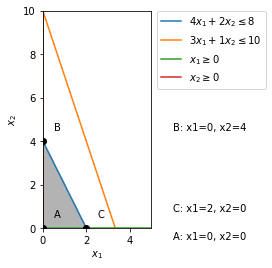

In [7]:
# this time I will try with just intercepts
def plot_constraints_2():
    x1_lim, x2_lim = 5, 10
    x1 = np.linspace(0, 10, 10)

    # 4x_1 +2x_2 ≤8
    plt.plot([(8/4),0], [0,(8/2)], label=r'$4x_1 +2x_2 \leq 8$')

    # 3x_1 +1x_2 ≤10
    plt.plot([(10/3),0], [0,(10/1)], label=r'$3x_1 +1x_2 \leq10$')

    # x_1,x_2 ≥0
    plt.plot([0,x1_lim], [0,0], label=r'$x_1 \geq0$')
    plt.plot([0,0], [0,x2_lim], label=r'$x_2 \geq0$')

    # Plot's Params
    plt.xlim(0,x1_lim)
    plt.ylim(0,x2_lim)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    
# plot the feasible region
def plot_feasible_2():
    d = np.linspace(0,10,200)
    x1,x2 = np.meshgrid(d,d)
    plt.imshow( ((4*x1+2*x2<=8) & (3*x1+1*x2<=10)).astype(int), 
                    extent=(x1.min(),x1.max(),x2.min(),x2.max()),
                       origin="lower", cmap="Greys", alpha = 0.3);
    
# Plot Corners
def plot_corners_2a():
    '''
    Coordinate given by:
        Ax+By=C
        x= ((C1*B2)-(C2*B1)) / ((A1*B2)-(A2*B1))
    '''
    # Corner A
    A_x1= 0
    A_x2= 0
    plt.plot(A_x1, A_x2,'ko')
    plt.text(A_x1 +0.5, A_x2 +0.5, "A", fontsize=10)
    plt.text(6, A_x2 - 0.5 , f"A: x1={A_x1}, x2={A_x2}", fontsize=10)

    # Corner B
    B_x1= 0
    B_x2= 4
    plt.plot(B_x1, B_x2,'ko')
    plt.text(B_x1 +0.5, B_x2 +0.5, "B", fontsize=10)
    plt.text(6, B_x2 + 0.5 , f"B: x1={B_x1}, x2={B_x2}", fontsize=10)

    # Corner C
    C_x1= 2
    C_x2= 0
    plt.plot(C_x1, C_x2,'ko')
    plt.text(C_x1 +0.5, C_x2 +0.5, "C", fontsize=10)
    plt.text(6, C_x2 + 0.75 , f"C: x1={C_x1}, x2={C_x2}", fontsize=10)
    
    return A_x1,A_x2,B_x1,B_x2,C_x1,C_x2
    
plot_constraints_2()
plot_feasible_2()
a_x1,a_x2,b_x1,b_x2,c_x1,c_x2 = plot_corners_2a()

In [8]:
# Max z=3x_1 + 1x_2
def calc_z_2(x1,x2):
        return (3*x1)+(1*x2)
    
print(f"Value of Z at A: {calc_z_2(a_x1,a_x2)}")
print(f"Value of Z at B: {calc_z_2(b_x1,b_x2)}")
print(f"Value of Z at C: {calc_z_2(c_x1,c_x2)}")

Value of Z at A: 0
Value of Z at B: 4
Value of Z at C: 6


From this we find the highest value of $z$ is 6, obtained when $x_1$ is 2 and $x_2$ is 0

## B) Give the shadow price of each constraint. 

In [9]:
# Shadow Prices
# 4x_1 +2x_2 ≤ 9
# x_2 = 4.5 -2x_1
# 10 -3x_1 = 4.5 -2x_1
x_1b = 10-4.5
x_2b = 4.5 - (2*x_1b)
sp_b = calc_z_2(x_1b,x_2b)-calc_z_2(c_x1,c_x2)
print(f"The shadow price of constraint 1 is {sp_b} per unit")
# 3x_1 +1x_2 ≤11 is zero
print("The shadow price of constraint 2 is 0")

The shadow price of constraint 1 is 4.0 per unit
The shadow price of constraint 2 is 0


## C) Give the range on each objective function coefficient.

**Range on Objective Function Coefficients** \
$z=3x_1 + 1x_2$ 

Solving for $x_1$ \
$x_1 = 2 -x_2$ \
$x_1 = 0 -0x_2$ 

Gives:\
$-1 \leq -\frac{c_1}{c_2} \leq -0$

Solving for $c_1 = 3$ \
$-1 \leq -\frac{3}{c_2} \leq 0$ \
$1c_2 \geq 3 \geq 0c_2$ \
$c_2 \geq 3 $, $c_2 \leq$ Undefined \
$\mathbf{3 \leq c_2}$ 

Solving for $c_2 = 1$ \
$-1 \leq -\frac{c_1}{1} \leq 0$ \
$1 \geq c_1 \geq 0$ \
$\mathbf{0 \leq c_1 \leq 1}$ 

For coefficient values between greater than $3$ $x_1 = 2$ remains optimal.\
And for coefficient values between $0$ and $1$ the value of $x_2 = 0$ remains optimal.

## D) Give the range of each right hand side.

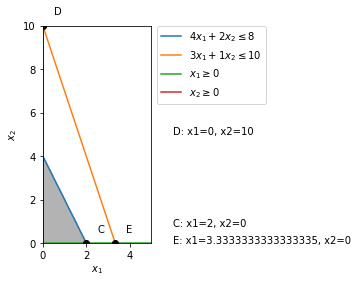

In [10]:
# Range of Each Right Hand Side
def plot_corners_2b():
    '''
    Coordinate given by:
        Ax+By=C
        x= ((C1*B2)-(C2*B1)) / ((A1*B2)-(A2*B1))
    '''
    # Corner D
    d_x1= 0
    d_x2= 10
    plt.plot(d_x1, d_x2,'ko')
    plt.text(d_x1 +0.5, d_x2 +0.5, "D", fontsize=10)
    plt.text(6, d_x2 -5, f"D: x1={d_x1}, x2={d_x2}", fontsize=10)

    # Corner E
    e_x1= 10/3
    e_x2= 0
    plt.plot(e_x1, e_x2,'ko')
    plt.text(e_x1 +0.5, e_x2 +0.5, "E", fontsize=10)
    plt.text(6, e_x2, f"E: x1={e_x1}, x2={e_x2}", fontsize=10)
    
    # Corner C (Current Optimum)
    C_x1= 2
    C_x2= 0
    plt.plot(C_x1, C_x2,'ko')
    plt.text(C_x1 +0.5, C_x2 +0.5, "C", fontsize=10)
    plt.text(6, C_x2 + 0.75 , f"C: x1={C_x1}, x2={C_x2}", fontsize=10)

plot_constraints_2()
plot_feasible_2()
plot_corners_2b()

**Constraint 1:** $4x_1 +2x_2 ≤ 8$ \
Can decrease until Point D or E. \
Since both yield the same $z$ value, after constraint 1 reaches the lower E there is no further increase.

$4(3\frac{1}{3}) + 2(0) = 13\frac{1}{3}$ \
So constraint 1 can increase by $5\frac{1}{3}$ before nothing further increases the $z$.

# Problem 3.
A small aerospace company will be introducing a new line of lightweight bicycle frames to benefit from the recent interest in dual use technologies. 
The frames can be made from special aluminum and composite alloys. 
The frames will be produced in two models, “deluxe” and “professional”. 
The anticipated profits are currently \\$10 for a deluxe frame and \\$16 for a professional frame. 
The number of pounds of each alloy required for each frame is summarized below:

|   |Aluminum Alloy | Composite Alloy |
|---|---|---|
|Deluxe| 2 | 3 |
|Professional| 4 | 2 |


  The supplier can deliver 100 lbs. of the aluminum alloy per week and 80 lbs of the composite alloy per week.  
  
a) What is the optimal weekly production schedule?  
b) Within what limits must the unit profits lie for each of the frames for the solution to remain optimal?  
c) Suppose an additional amount of the aluminum alloy were made available for $2.50 per pound. Should it be purchased?

Deluxe: $x_1 \geq 0$ \
Professional: $x_2 \geq 0$ \
Profit: $z = 10x_1 + 16x_2$ \
Aluminum: $2x_1 + 4x_2 \leq 100$ \
Composite: $3x_1 + 2x_2 \leq 80$ 

## A) What is the optimal weekly production schedule?  

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Profit at A: 0
Profit at B: 400.0
Profit at C: 266.6666666666667
Profit at D: 430.0


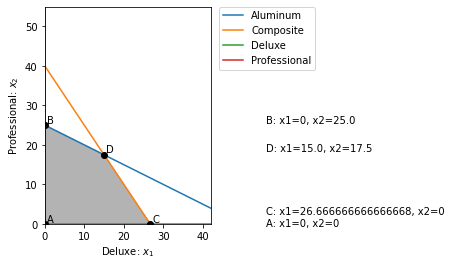

In [12]:
def plot_constraints_3():
    x1_lim, x2_lim = 42, 55
    
    # Aluminum: 2x_1 + 4x_2 <= 100
    plt.plot([(100/2),0], [0,(100/4)], label=r'Aluminum')

    # Composite: 3x_1 + 2x_2 <= 80
    plt.plot([(80/3),0], [0,(80/2)], label=r'Composite')

    # x_1,x_2 ≥0
    plt.plot([0,x1_lim], [0,0], label=r'Deluxe')
    plt.plot([0,0], [0,x2_lim], label=r'Professional')

    # Plot's Params
    plt.xlim(0,x1_lim)
    plt.ylim(0,x2_lim)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'Deluxe: $x_1$')
    plt.ylabel(r'Professional: $x_2$')
    
# plot the feasible region
def plot_feasible_3():
    d = np.linspace(0,70,350)
    x1,x2 = np.meshgrid(d,d)
    plt.imshow( ((2*x1 + 4*x2 <= 100) & (3*x1 + 2*x2 <= 80)).astype(int), 
                    extent=(x1.min(),x1.max(),x2.min(),x2.max()),
                       origin="lower", cmap="Greys", alpha = 0.3);
    
# Plot Corners
def plot_corners_3a():
    '''
    Coordinate given by:
        Ax+By=C
        x= ((C1*B2)-(C2*B1)) / ((A1*B2)-(A2*B1))
    '''
    # Corner A
    A_x1= 0
    A_x2= 0
    plt.plot(A_x1, A_x2,'ko')
    plt.text(A_x1 +0.5, A_x2 +0.5, "A", fontsize=10)
    plt.text(56, A_x2 - 0.5 , f"A: x1={A_x1}, x2={A_x2}", fontsize=10)

    # Corner B
    B_x1= 0
    B_x2= (100/4)
    plt.plot(B_x1, B_x2,'ko')
    plt.text(B_x1 +0.5, B_x2 +0.5, "B", fontsize=10)
    plt.text(56, B_x2 + 0.5 , f"B: x1={B_x1}, x2={B_x2}", fontsize=10)

    # Corner C
    C_x1= (80/3)
    C_x2= 0
    plt.plot(C_x1, C_x2,'ko')
    plt.text(C_x1 +0.5, C_x2 +0.5, "C", fontsize=10)
    plt.text(56, C_x2 + 2.5 , f"C: x1={C_x1}, x2={C_x2}", fontsize=10)
    
    # Corner D
    D_x1= ((100*2)-(80*4)) / ((2*2)-(3*4))
    D_x2= ((100*3)-(80*2)) / ((4*3)-(2*2))
    plt.plot(D_x1, D_x2,'ko')
    plt.text(D_x1 +0.5, D_x2 +0.5, "D", fontsize=10)
    plt.text(56, D_x2 + 0.75 , f"D: x1={D_x1}, x2={D_x2}", fontsize=10)
    
    return A_x1,A_x2,B_x1,B_x2,C_x1,C_x2,D_x1,D_x2
  
plot_constraints_3()
plot_feasible_3()
a_x1,a_x2,b_x1,b_x2,c_x1,c_x2,d_x1,d_x2 = plot_corners_3a()

# Max z=10x_1 + 16x_2
def calc_z_2(x1,x2):
        return (10*x1)+(16*x2)
    
print(f"Profit at A: {calc_z_2(a_x1,a_x2)}")
print(f"Profit at B: {calc_z_2(b_x1,b_x2)}")
print(f"Profit at C: {calc_z_2(c_x1,c_x2)}")
print(f"Profit at D: {calc_z_2(d_x1,d_x2)}")

The optimal weekly schedule is to produce 15 Deluxe frames and 17.5 Professional frames for a profit of \\$430. If a half frame is not feasible, the optimal is 17 professional frames and an adjusted profit of \\$422.

## B) Within what limits must the unit profits lie for each of the frames for the solution to remain optimal?  

**Range on Objective Function Coefficients** \
$z=10x_1 + 16x_2$ 

Solving for $x_2$

$x_2 = 25 -0.5x_1$ \
$x_2 = 40 -1.5x_1$ 

Gives:

$-1.5 \leq -\frac{c_1}{c_2} \leq -0.5$

Solving if $c_2 = 16$

$-1.5 \leq -\frac{c_1}{16} \leq -0.5$ \
$24 \geq c_1 \geq 8$ \
$\mathbf{8 \leq c_1 \leq 24}$ 

Solving if $c_1 = 10$ 

$-1.5 \leq -\frac{10}{c_2} \leq -0.5$ \
$1.5c_2 \geq 10 \geq 0.5c_2$ \
$c_2 \geq 6.67 $, $c_2 \leq 20$ \
$\mathbf{6.67 \leq c_2 \leq 20}$ 


This solution remains optimal for Deluxe frame profits between \\$8 and \\$24 and for Professional frames profits between \\$6.67 and \\$20.

## C) Suppose an additional amount of the aluminum alloy were made available for $2.50 per pound. Should it be purchased?

Profit will increase until $x_2 = 40$ \
Aluminum: $(0)2 + (40)4 = 100 + c$ \
$c = 60$ \
Additional cost = $(60)2.50 = 150$ \
New profit = $(0)10 + (40)16 - 150$ = \\$490 

If aluminum is available for \\$2.50 up to 60lbs should be purchased. Ratio of production will change depending on how much aluminum is available. If the full 60lbs can be purchased production will shift to 40 professional bikes with an adjusted profit of \\$490.

# Problem 4.
a) For the following constraints, graph the constraints and give all basic solution vectors. Indicate which solutions are feasible and which are not. Don’t forget to add the slack variables.  

$$\begin{aligned}
    2x_1+4x_2 &≥12 \\
    6x_1+4x_2 &≤24 \\
    x_1 , x_2 &≥ 0
\end{aligned}$$

b) Determine if the following system of equations is consistent and if it is consistent, does it have a unique solution or infinite solutions.
$$\begin{aligned}
    2x + 3y - 2z &= 40 \\
    3x - 2y + 1z &= 60 \\
    1x - 5y + 3z &= 20
\end{aligned}$$


## A) For the following constraints, graph the constraints and give all basic solution vectors. Indicate which solutions are feasible and which are not. Don’t forget to add the slack variables. 

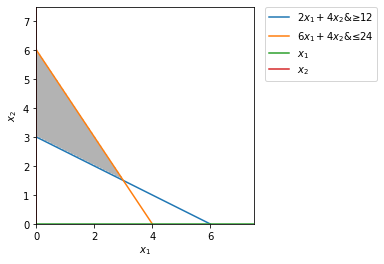

In [13]:
def plot_constraints_4():
    x1_lim, x2_lim = 7.5, 7.5

    # 2x_1+4x_2 >= 12
    plt.plot([(12/2),0], [0,(12/4)], label=r'$2x_1+4x_2 &≥12$')
    
    # 6x_1+4x_2 <= 24
    plt.plot([(24/6),0], [0,(24/4)], label=r'$6x_1+4x_2 &≤24$')

    # x_1,x_2 ≥0
    plt.plot([0,x1_lim], [0,0], label=r'$x_1$')
    plt.plot([0,0], [0,x2_lim], label=r'$x_2$')

    # Plot's Params
    plt.xlim(0,x1_lim)
    plt.ylim(0,x2_lim)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
      
# plot the feasible region
def plot_feasible_4():
    d = np.linspace(0,10,200)
    x1,x2 = np.meshgrid(d,d)
    plt.imshow( ((2*x1+4*x2 >=12) & (6*x1+4*x2 <=24)).astype(int), 
                    extent=(x1.min(),x1.max(),x2.min(),x2.max()),
                       origin="lower", cmap="Greys", alpha = 0.3);
    
plot_constraints_4()
plot_feasible_4()

$$\begin{aligned}
    2x_1+4x_2 &≥12 \\
    6x_1+4x_2 &≤24 \\
    x_1 , x_2 &≥ 0
\end{aligned}$$
Adding in surplus and artificial variables becomes:
$$\begin{aligned}
    2x_1+4x_2 -s_1 \hspace{2em} + A_1 &=12 \\
    6x_1+4x_2 \hspace{2em} +s_2 \hspace{2em}    &=24 \\
    x_1,x_2,s_1,s_2,A_1 &≥ 0
\end{aligned}$$
Initial Feasable Solution $(x_1,x_2) = (0,0)$:
$$\begin{aligned}
    2(0)+4(0) -s_1 \hspace{2em} + A_1 &=12        &s_1 = 0\\
    6(0)+4(0) \hspace{2em} +s_2 \hspace{2em} &=24 &s_2 = 24 \\
    x_1,x_2,s_1,s_2,A_1 &≥ 0 & A_1 = 12
\end{aligned}$$
$(x_1,x_2) = (0,0)$ is infeasible. \
Solving for $(x_1,x_2) = (0,6)$:
$$\begin{aligned}
    2(0)+4(6) -s_1 \hspace{2em} + A_1 &=12        &s_1 = 12\\
    6(0)+4(6) \hspace{2em} +s_2 \hspace{2em} &=24 &s_2 = 0 \\
    x_1,x_2,s_1,s_2,A_1 &≥ 0 & A_1 = 0
\end{aligned}$$
$(x_1,x_2) = (0,6)$ is feasible. \
Solving for $(x_1,x_2) = (0,3)$:
$$\begin{aligned}
    2(0)+4(3) -s_1 \hspace{2em} + A_1 &=12        &s_1 = 0\\
    6(0)+4(3) \hspace{2em} +s_2 \hspace{2em} &=24 &s_2 = 12 \\
    x_1,x_2,s_1,s_2,A_1 &≥ 0 & A_1 = 0
\end{aligned}$$
$(x_1,x_2) = (0,6)$ is feasible. \
Solving for $(x_1,x_2) = (3,1)$:
$$\begin{aligned}
    2(3)+4(1) -s_1 \hspace{2em} + A_1 &=12        &s_1 = 0\\
    6(3)+4(1) \hspace{2em} +s_2 \hspace{2em} &=24 &s_2 = 2 \\
    x_1,x_2,s_1,s_2,A_1 &≥ 0 & A_1 = 0
\end{aligned}$$
$(x_1,x_2) = (3,1)$ is feasible.

## B) Determine if the following system of equations is consistent and if it is consistent, does it have a unique solution or infinite solutions.

$$\begin{aligned}
    2x + 3y - 2z &= 40 \\
    3x - 2y + 1z &= 60 \\
    1x - 5y + 3z &= 20
\end{aligned}$$

$R1=R2-R3$, \
$R2=R1+R3$, \
$R3=R2-R1$ \
Therefore this system of equations is consistent.

$$\begin{aligned}
\begin{bmatrix}
    2 & 3 & -2 & 40 \\
    3 & -2 & 1 & 60 \\
    1 & -5 & 3 & 20
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    1 & -5 & 3 & 20 \\
    2 & 3 & -2 & 40 \\
    3 & -2 & 1 & 60    
\end{bmatrix}
\xrightarrow[R3-3R1]{R2-2R1}
\begin{bmatrix}
    1 & -5 & 3 & 20 \\
    0 & 13 & -8 & 0 \\
    0 & 13 & -8 & 0    
\end{bmatrix}& \\
\xrightarrow[R3-R2]{R2/13}
\begin{bmatrix}
    1 & -5 & 3 & 20 \\
    0 & 1 & -8/13 & 0 \\
    0 & 0 & 0 & 0    
\end{bmatrix}
\xrightarrow{R1+5R2}
\begin{bmatrix}
    1 & 0 & -1/13 & 20 \\
    0 & 1 & -8/13 & 0 \\
    0 & 0 & 0 & 0    
\end{bmatrix}&
\end{aligned}$$

This system of equations has infinitely many solutions.